In [1]:
# base will be importing the following modules:
# import subprocess
# import pandas as pd
# from sklearn.model_selection import KFold
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt

from src.base import *

C:\Users\noema\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Grab x and y values from src/survey lung cancer.csv

In [2]:
x, y = get_data('src/survey lung cancer.csv')

In [3]:
print(x)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

### Select one fold to use as a demonstration

In [4]:
curr_fold  = get_folds(x)[0]
train, test = curr_fold

### Make training and test data sets and data loaders from the fold indices

In [5]:
X_train = torch.Tensor(x.iloc[train, :].values)
y_train = torch.Tensor(y.iloc[train].values)
y_train = y_train.view(y_train.shape[0], 1)
X_test = torch.Tensor(x.iloc[test, :].values)
y_test = torch.Tensor(y.iloc[test].values)
y_test = y_test.view(y_test.shape[0], 1)

In [6]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)

In [7]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

### Create your model and select your criterion and optimizer

In [8]:
model = classifier(input_size=x.shape[1], hidden_size=20, num_classes=1)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Pass them into your agent

In [9]:
pred_model = predictor_model(model, criterion, optimizer)

### Train your agent 

In [10]:
train_loss = pred_model.train(train_loader, 50)

Epoch [1/50], Loss: 0.4327
Epoch [2/50], Loss: 0.4296
Epoch [3/50], Loss: 0.4311
Epoch [4/50], Loss: 0.4281
Epoch [5/50], Loss: 0.4357
Epoch [6/50], Loss: 0.4296
Epoch [7/50], Loss: 0.4296
Epoch [8/50], Loss: 0.4281
Epoch [9/50], Loss: 0.4311
Epoch [10/50], Loss: 0.4327
Epoch [11/50], Loss: 0.4281
Epoch [12/50], Loss: 0.4281
Epoch [13/50], Loss: 0.4327
Epoch [14/50], Loss: 0.4311
Epoch [15/50], Loss: 0.4296
Epoch [16/50], Loss: 0.4372
Epoch [17/50], Loss: 0.4311
Epoch [18/50], Loss: 0.4311
Epoch [19/50], Loss: 0.4281
Epoch [20/50], Loss: 0.4311
Epoch [21/50], Loss: 0.4311
Epoch [22/50], Loss: 0.4311
Epoch [23/50], Loss: 0.4311
Epoch [24/50], Loss: 0.4296
Epoch [25/50], Loss: 0.4296
Epoch [26/50], Loss: 0.4281
Epoch [27/50], Loss: 0.4342
Epoch [28/50], Loss: 0.4296
Epoch [29/50], Loss: 0.4281
Epoch [30/50], Loss: 0.4327
Epoch [31/50], Loss: 0.4296
Epoch [32/50], Loss: 0.4296
Epoch [33/50], Loss: 0.4327
Epoch [34/50], Loss: 0.4311
Epoch [35/50], Loss: 0.4327
Epoch [36/50], Loss: 0.4342
E

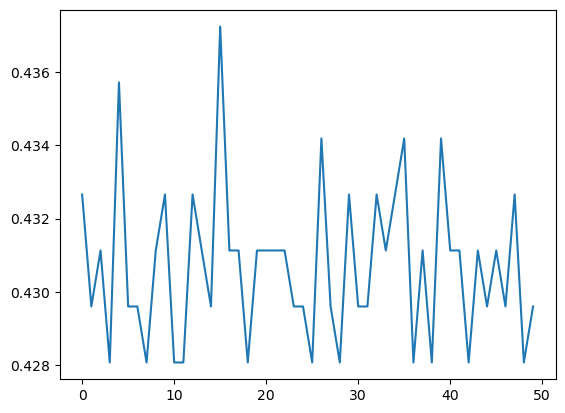

In [11]:
plt.plot(train_loss)
plt.show()

### Evaluate your agent

In [12]:
pred_model.evaluate(val_loader)

Validation Accuracy: 83.87%


0.8387096774193549